# Objective of the analysis

# Predict next-day rain by training classification models on the target variable RainTomorrow.

# Context of the data

###  dataset contains about 10 years of daily weather observations from many locations across Australia.


###  RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weatherAUS.csv")
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


#  About the data

Date :The date of observation

Location :The common name of the location of the weather station

MinTemp :The minimum temperature in degrees celsis

MaxTemp :The maximum temperature in degrees celsius

Rainfall :The amount of rainfall recorded for the day in mm

Evaporation :The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine :The number of hours of bright sunshine in the day

WindGustDir :The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed :The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am :Direction of the wind at 9am




### step1 describe the problem at a hand
Predict the possiblity of the raining tommorrow in the Australia based on the weather condition available that  is being experienced at the atmospheric condtion of the Austalia 


### step2  Why does the problem need to be solved
To enable us to predict correctly the weather condtion to the public 
To check the possible trend in the  weather condition to be ina position to  know if their is climate change
To data collected  is used by the public for  various ways so it is viatl we get the correct data

### step3 How will i solve the problem 
This is a calssification problem that is it will rain or not rain so to solve the problem 

1 Try to understand  the data abit

2 Data preparation

3 Data visualization to flash out some domain knowledge

4 Data selection

5 Data transformation

6 Fit  the algorithm

7 Imporove the model

8 Check out the accurany of the algorithms

9 Present the results


In [3]:
#checking the number of row sand columns
df.shape

(145460, 23)

In [4]:
#the names of the columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#checking the data type of the  data
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

From this we see Date is not in the right data type and so as all the columns with the object as their data type

In [6]:
#getting the statistical info  of the data 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


From the above statistical info we figure we need to standardize the data  for better comparison between various varaibles

In [7]:
#checking for null values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Their is massive data missing in this data set

In [8]:
#imputation of the null varaible in the data
df.fillna(method='bfill',inplace=True)

In [9]:
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,2.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,8.0,18.1,26.5,No,No


In [10]:
#checking if  after  the imputation the data is complete
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             1
Rainfall            0
Evaporation      1579
Sunshine         3157
WindGustDir         1
WindGustSpeed       1
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        1
dtype: int64

In [11]:
df['Evaporation'].fillna(df['Evaporation'].mean(),inplace=True)
df['Evaporation'].isnull().sum()

0

In [12]:
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace=True)
df['Sunshine'].isnull().sum()

0

In [13]:
df['WindGustDir'].fillna(method='ffill',inplace=True)
df['WindGustDir'].isnull().sum()

0

In [14]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindGustSpeed'].isnull().sum()

0

In [15]:
df['RainTomorrow'].fillna(method='ffill',inplace=True)
df['RainTomorrow'].isnull().sum()

0

In [16]:
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['MaxTemp'].isnull().sum()

0

In [17]:
#checking if the data is clean
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

The data as no null values as per now

In [18]:
#converting Date into the right data type
df['Date']=pd.to_datetime(df.Date)
df['Date'].head(2)

0   2008-12-01
1   2008-12-02
Name: Date, dtype: datetime64[ns]

In [19]:
#checking ut the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null datetime64[ns]
Location         145460 non-null object
MinTemp          145460 non-null float64
MaxTemp          145460 non-null float64
Rainfall         145460 non-null float64
Evaporation      145460 non-null float64
Sunshine         145460 non-null float64
WindGustDir      145460 non-null object
WindGustSpeed    145460 non-null float64
WindDir9am       145460 non-null object
WindDir3pm       145460 non-null object
WindSpeed9am     145460 non-null float64
WindSpeed3pm     145460 non-null float64
Humidity9am      145460 non-null float64
Humidity3pm      145460 non-null float64
Pressure9am      145460 non-null float64
Pressure3pm      145460 non-null float64
Cloud9am         145460 non-null float64
Cloud3pm         145460 non-null float64
Temp9am          145460 non-null float64
Temp3pm          145460 non-null float64
RainToday        145460 n

In [20]:
#checking for duplicates 
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

Our data has no duplicates  which is awesome.

In [21]:
#checking the unique entites of location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [22]:
#unique entiteis of WindGustDir
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [23]:
#unique entities of RainToday
df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
#dropping the catolical varaibles
data1=df.drop(['Location','WindGustDir','RainToday','RainTomorrow','WindDir9am','WindDir3pm'],axis=1)
data1.head(1)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,12.0,12.3,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8


In [26]:
#dealing with catorical varaible
data=df[['Location','WindGustDir','RainToday','RainTomorrow','WindDir9am','WindDir3pm']]
data.head()

,Location,WindGustDir,RainToday,RainTomorrow,WindDir9am,WindDir3pm
0,Albury,W,No,No,W,WNW
1,Albury,WNW,No,No,NNW,WSW
2,Albury,WSW,No,No,W,WSW
3,Albury,NE,No,No,SE,E
4,Albury,W,No,No,ENE,NW


In [27]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
results=encoder.fit_transform(data)
results

array([[ 2., 13.,  0.,  0., 13., 14.],
       [ 2., 14.,  0.,  0.,  6., 15.],
       [ 2., 15.,  0.,  0., 13., 15.],
       ...,
       [41.,  3.,  0.,  0.,  9., 14.],
       [41.,  9.,  0.,  0., 10.,  3.],
       [41.,  9.,  0.,  0.,  2.,  2.]])

In [28]:
data4=pd.DataFrame(results,columns=['Location','WindGustDir','RainToday','RainTomorrow','WindDir9am','WindDir3pm'])
data4.head()

,Location,WindGustDir,RainToday,RainTomorrow,WindDir9am,WindDir3pm
0,2.0,13.0,0.0,0.0,13.0,14.0
1,2.0,14.0,0.0,0.0,6.0,15.0
2,2.0,15.0,0.0,0.0,13.0,15.0
3,2.0,4.0,0.0,0.0,9.0,0.0
4,2.0,13.0,0.0,0.0,1.0,7.0


In [91]:
#joing the two dataframe
datafull=pd.concat([data1,data4],axis=1)
datafull.head(3)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,RainToday,RainTomorrow,WindDir9am,WindDir3pm
0,2008-12-01,13.4,22.9,0.6,12.0,12.3,44.0,20.0,24.0,71.0,...,8.0,2.0,16.9,21.8,2.0,13.0,0.0,0.0,13.0,14.0
1,2008-12-02,7.4,25.1,0.0,12.0,12.3,44.0,4.0,22.0,44.0,...,7.0,2.0,17.2,24.3,2.0,14.0,0.0,0.0,6.0,15.0
2,2008-12-03,12.9,25.7,0.0,12.0,12.3,46.0,19.0,26.0,38.0,...,7.0,2.0,21.0,23.2,2.0,15.0,0.0,0.0,13.0,15.0


In [90]:
#Diving the data into target and into features
features=datafull.iloc[:,:-3]
features.head(1)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,RainToday
0,2008-12-01,13.4,22.9,0.6,12.0,12.3,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,2.0,13.0,0.0


All our data at this point is a numeical numeber hence   the rght format for the machine learning algorithms

In [31]:
target=datafull['RainTomorrow']
target.head(1)

0    0.0
Name: RainTomorrow, dtype: float64

# Data visualization

In [32]:
df['RainTomorrow'].value_counts()


No     111716
Yes     33744
Name: RainTomorrow, dtype: int64

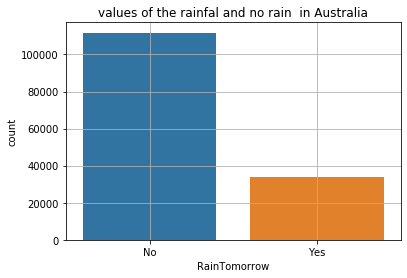

In [33]:
sns.countplot(df['RainTomorrow'],label="counts")
No,Yes=df['RainTomorrow'].value_counts()
plt.title('values of the rainfal and no rain  in Australia')
plt.grid()

Ausstralia does it rain that often majority of the output indicate no rainfal in the following day

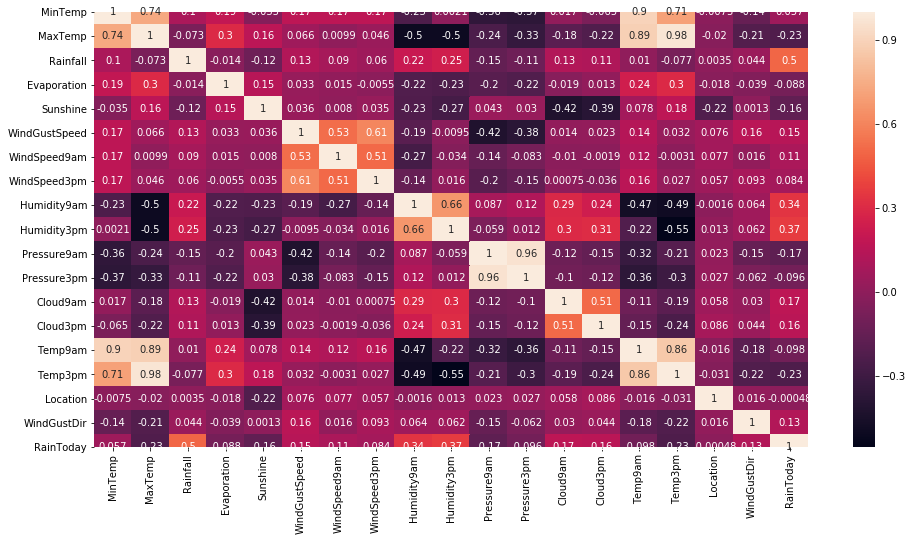

In [148]:
plt.figure(figsize=(16,8))
sns.heatmap(features.corr(),annot=True)

correlation is in between temp9am,temp3am,tempam,maxtemp,mintemp

and generally we tend to remove the varaibles which are highly corelated 

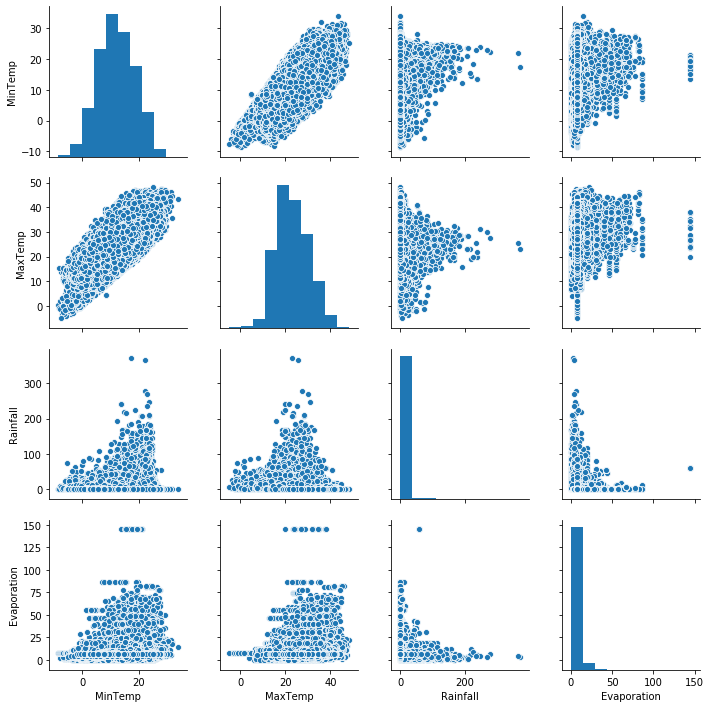

In [34]:
sns.pairplot(features.iloc[:,1:5])


mintemp  and maxtemp are correlated

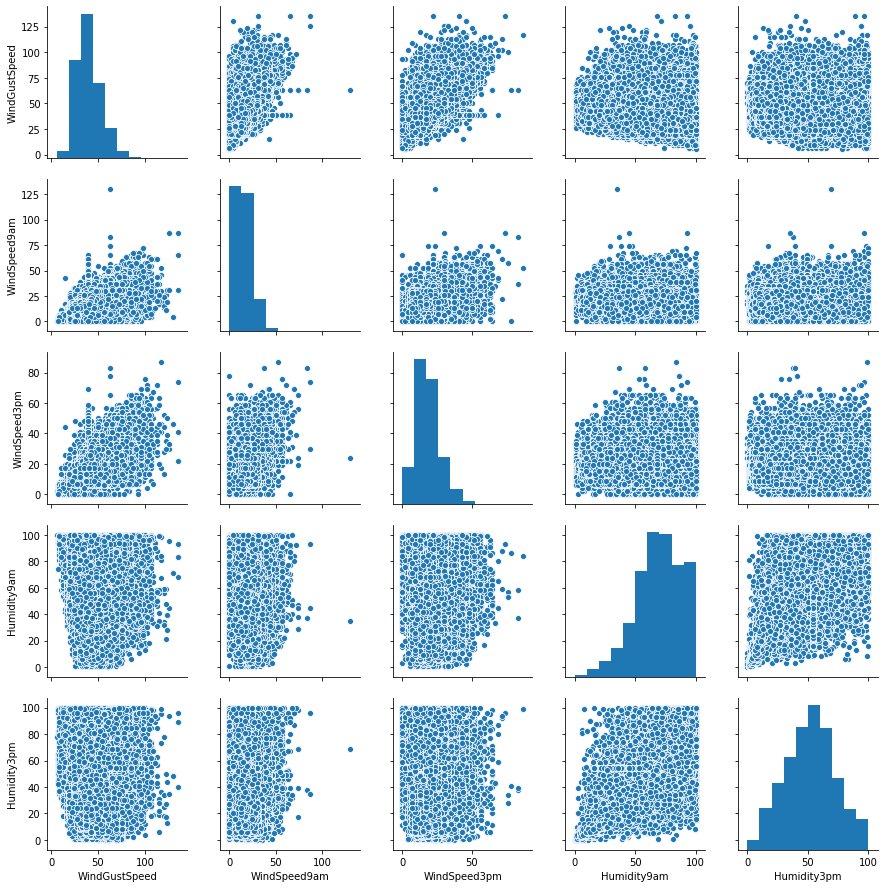

In [35]:
sns.pairplot(features.iloc[:,6:11])

no correlation found in the above

In [105]:
features.drop(['Date'],axis=1,inplace=True)

# Feature selection

## spliting the data into test and training set 

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [108]:
x_train.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,RainToday
111548,14.5,17.8,14.2,5.6,13.100000,39.0,0.0,22.0,94.0,49.0,1024.1,1022.5,8.0,5.0,16.2,27.7,1.0,10.0,1.0
142528,24.6,39.5,0.0,12.0,8.363144,31.0,9.0,17.0,52.0,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,16.0,9.0,0.0


In [109]:
y_train.head(2)

111548    1.0
142528    0.0
Name: RainTomorrow, dtype: float64

# Fitting the algorithms

In [124]:
#fitting the logistic algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
#predicting the results
predicted=model.predict(x_test)

In [128]:
#the probablity of getting zero  which is no rain
model.predict_proba(x_test)[:,0]

array([0.43774671, 0.96811668, 0.45390011, ..., 0.61011905, 0.71689872,
       0.87868493])

In [129]:
#the propablity of getting 1 which is  they will be rain
model.predict_proba(x_test)[:,1]

array([0.56225329, 0.03188332, 0.54609989, ..., 0.38988095, 0.28310128,
       0.12131507])

In [126]:
predicted

array([1., 0., 1., ..., 0., 0., 0.])

In [133]:
#checking the accuracy of the model
from sklearn.metrics import  accuracy_score
ac=accuracy_score(y_test,predicted)
ac

0.8307094733947477

So our accurancy of the model is 83%

In [134]:
#checking for overfitting or underfitting
model.score(x_train,y_train)

0.8316031898803795

In [135]:
model.score(x_test,y_test)

0.8307094733947477

From the above scores the model has no incident of underfitting or overfitting

#### Compare model accuracy with null accuracy


In [138]:
#first we check the class distribution of the  y_test
y_test.value_counts()

0.0    22320
1.0     6772
Name: RainTomorrow, dtype: int64

So the majority output was no rain

In [139]:
#nullscore
null_score=22320/(22320+ 6772)
null_score

0.7672212292039049

So from the above the model score  is 0.83 and the null score is 0.76 so we conclude that our logistic regression

model is doing a very good job in predicting the class labels

### So at this point our model is doing great but it is not in  position to tell us the type of errors our model is making nor  the underlying distribution of values. so we try confusion matrix .

In [142]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
cm

array([[21002,  1318],
       [ 3607,  3165]])

21002 -true positive

3165- True negative

1318 -False positive this is type1 error

3607 -False negative  Type11  error

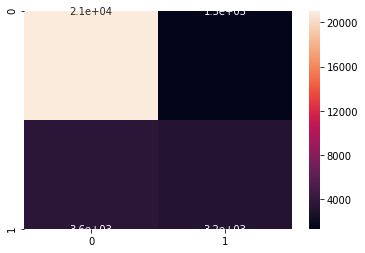

In [144]:
#visualize the results
sns.heatmap(cm,annot=True)

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

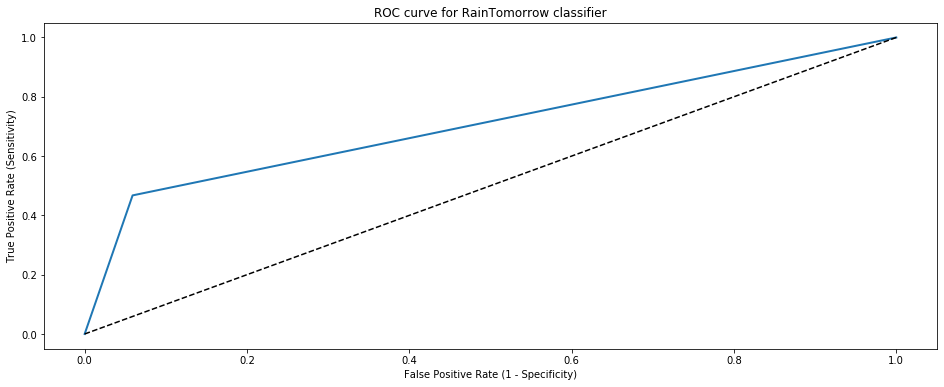

In [150]:
from sklearn.metrics import roc_curve
frc,tpr,thershold=roc_curve(y_test,predicted)
plt.figure(figsize=(16,6))
plt.plot(frc,tpr,linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')


 Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC

In [152]:
#ROC-CURVE
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,predicted)
roc

0.7041577219713474

Our classifier model is doing a good job in predicted  whether it will rain or not

# Model evaluation and improvement

In [169]:
#use of Recursive Feature Elimination with Cross Validation for elimantion of the weakess features in the model
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv=rfecv.fit(x_train,y_train)


In [170]:
rfecv.n_features_

12

In [172]:
#transform the training data
x_train_rfecv=rfecv.transform(x_train)
x_train_rfecv

array([[14.5, 14.2,  5.6, ...,  8. ,  5. ,  1. ],
       [24.6,  0. , 12. , ...,  2. ,  4. ,  0. ],
       [14.7,  0.2,  3.2, ...,  7. ,  3. ,  0. ],
       ...,
       [ 7.6,  0. ,  6. , ...,  2. ,  2. ,  0. ],
       [ 8.8,  0. ,  1.2, ...,  3. ,  7. ,  0. ],
       [15.8,  0. ,  9.2, ...,  2. ,  2. ,  0. ]])

In [173]:
#train the classifier
model.fit(x_train_rfecv,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
#test calssifier on the test data
x_test_rfecv=rfecv.transform(x_test)
x_test_rfecv

array([[15. ,  4.2,  6.6, ...,  4. ,  5. ,  1. ],
       [13.1,  0. ,  4.6, ...,  0. ,  1. ,  0. ],
       [19. , 34.6, 11. , ...,  7. ,  7. ,  1. ],
       ...,
       [14.5,  0. ,  6. , ...,  4. ,  1. ,  0. ],
       [12.7,  0.8,  3.4, ...,  6. ,  5. ,  0. ],
       [20.2,  0. ,  8.8, ...,  7. ,  7. ,  0. ]])

In [175]:
y_predicted_rfecv=model.predict(x_test_rfecv)

In [176]:
#print out the accuracy of the tansformed data
model.score(x_test_rfecv,y_test)

0.8301251203079885

our oringal score was 83 and so is here

In [180]:
#using the confusion matrix to check out the accurancy 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_predicted_rfecv)
cm2

array([[21011,  1309],
       [ 3633,  3139]])

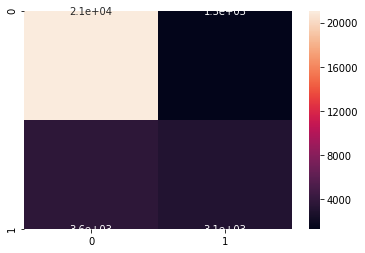

In [186]:
sns.heatmap(cm2,annot=True)

In [191]:
#use of k-fold cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")
score

array([0.83763695, 0.82791957, 0.83031839, 0.8312637 , 0.83109182])

We can summarize the cross-validation accuracy by calculating its mean.

In [192]:
score.mean()

0.831646086078581

### from the above cross validation score it show it has almost same value as the orginal value so it suggest the cross validation  has no great difference here

#  Hyperparameter Optimization using GridSearch CV 

In [ ]:
from sklearn.model_selection import  GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
gridsearch=GridSearchCV(estimator=model,cv=5,scoring='accuracy',param_grid = parameters,)
gridsearch.fit(x_train,y_train)

In [ ]:
#examimne the model
gridsearch.best_score_

In [ ]:
#print the parameters that give to the best score
gridsearch.best_params_

In [ ]:
#print  estimator that was choosen by gridsearch
gridsearch.best_estimator_

In [ ]:
#calculate the grid search score
gridsearch.score(x_test,y_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc=RandomForestClassifier()


In [112]:
rfe=RFE(estimator=rfc,n_features_to_select= 5,step=1)

In [113]:
rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators='warn', n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [114]:
print('The choosen features',x_train.columns[rfe.support_])

The choosen features Index(['MinTemp', 'Sunshine', 'Humidity3pm', 'Pressure3pm', 'Temp3pm'], dtype='object')


That is execellent as we can seen in the above cell the features collected have no colleration to each other

In [116]:
from sklearn.feature_selection import RFECV


In [117]:
ch4=RandomForestClassifier()

In [118]:
rfecv=RFECV(estimator=ch4,step=1,cv=5,scoring= 'accuracy')

In [119]:
rfecv=rfecv.fit(x_train,y_train)

In [120]:
print("Best features selected",x_train.columns[rfecv.support_])

Best features selected Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Location', 'WindGustDir', 'RainToday'],
      dtype='object')


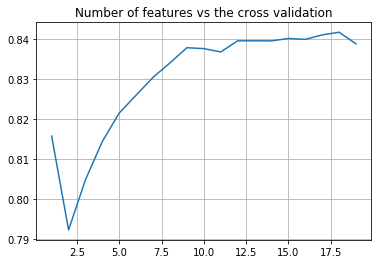

In [123]:
#ploting the nuember of featutes vs the cross validation
plt.plot(range(1,len(rfecv.grid_scores_)+ 1),rfecv.grid_scores_)
plt.title("Number of features vs the cross validation")
plt.grid()

It show the highest accuracy that can be achieved is  around 0.86

from the above we see the random forest has the best accuracy of 86% compared to lagistic regression hence the model created is working so good

# conclusion

The Randomforest regression model accuracy score is 0.86. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

The Randomforest regression model accuracy score is 0.83. So, the model is not as good as random forest  in predicting whether or not it will rain tomorrow in Australia.

Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

The model shows no signs of overfitting.

Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Increasing the threshold level results in increased accuracy.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

Our original model accuracy score is 0.8301 in logistic regression whereas accuracy score after RFECV is 0.8307. So, we can obtain approximately similar accuracy but with reduced set of features.

In the original model, we have FP = 1309whereas FP1 =1318 . So, we get approximately same number of false positives. Also, FN = 3633 whereas FN1 = 3165. So, we get slighly higher false negatives.

Our, original model score is found to be 0.8307. The average cross-validation score is 0.8301. So, we can conclude that cross-validation does not result in performance improvement.



